## Data Bootcamp Final Project
- Group Member: Dillon Fournier, Hoyoung Jun, Yingqiang Wang


In [1]:
!pip install lxml #needed to help read in HTML and EXCEL files from online
!pip install xlrd
!pip install geopandas
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import lxml
import datetime as dt 
import xlrd
from lxml import etree
from datetime import datetime

import fiona # Needed for geopandas to run
import geopandas as gpd # this is the main geopandas 
from shapely.geometry import Point, Polygon # also needed

#import pandas, matplotlib, and libraries to read html files


    100% |████████████████████████████████| 5.7MB 8.1MB/s 
    100% |████████████████████████████████| 112kB 4.6MB/s 
    100% |████████████████████████████████| 890kB 9.8MB/s 
    100% |████████████████████████████████| 4.4MB 7.4MB/s 
    100% |████████████████████████████████| 1.5MB 18.1MB/s 
    100% |████████████████████████████████| 15.7MB 2.6MB/s 
    100% |████████████████████████████████| 71kB 19.3MB/s 
  Running setup.py bdist_wheel for pyproj ... - \ | / - \ |

 / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/89/77/ec/a537585d1022dafde0317dd19d33c4a30d4ee61e19f25ebd8e
  Running setup.py bdist_wheel for click-plugins ... - done
  Stored in directory: /content/.cache/pip/wheels/bc/86/aa/7680e54728998edc1e966a20249b920e582012ed6bdd3815c4
  Running setup.py bdist_wheel for munch ... - done
  Stored in directory: /content/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built pyproj click-plugins munch


In [0]:


l = []                     #create an empty list for URLs

exc_data = pd.DataFrame()  #create an empty dataframe for excel files
html_data = pd.DataFrame() #create and empty dataframe for html files

#In this loop we bring in data files from the website chinabond.com. Each data file is on a separate page (different URL adress) so 
#we create a loop to bring in data for each month since 2001 to 2017.

for a in range(2001,2018):    #range of years 
  for b in range(1,13):       #range of months
    if b <= 9:                #if the month is a singular digit
      url = 'http://www.chinabond.com.cn/DownLoadxlsx?sId=0300&sBbly=' + str(a) +'0'+ str(b) + '&sMimeType=1&sc=EN'
      l.append(url) 
    else:                     #if the month is two digits
      url = 'http://www.chinabond.com.cn/DownLoadxlsx?sId=0300&sBbly=' + str(a) + str(b) + '&sMimeType=1&sc=EN'
      l.append(url)
      
counter = 0                   #create a counter to keep track the number of months
for i in l:                   #for each item in the list of urls
  counter += 1
  try:                        #try reading the data as a html file. If there is an exceprion, got to the excpet statement
    data = pd.read_html(i, skiprows=1) 
    data = data[1].iloc[:, :2].set_index(0)

    if counter / 12 > 9:                                #For years after 2009
      if counter%12 == 0:                                          #For December
        D = '20' + str(counter//12) + '/' + str(12)
      else:
        D = '20' + str(counter//12+1) + '/' + str(counter%12)
    else:                                        #For years between 2001 to 2009
      if counter%12 == 0:
        D = '200' + str(counter//12) + '/' + str(12)
      else:
        D = '200' + str(counter//12+1) + '/' + str(counter%12)
    new_header = [D]
    data = data[1:]
    data.columns = new_header                               #change column names
    html_data = pd.concat([html_data, data],axis=1)
  except:                                       # if the file is not a html file, read it as an excel file.
    data = pd.read_excel(i, skiprows=1).iloc[:, :2]
    if counter / 12 > 9:
      if counter%12 == 0:
        D = '20' + str(counter//12) + '/' + str(12)
      else:
        D = '20' + str(counter//12+1) + '/' + str(counter%12)
    else:
      if counter%12 == 0:
        D = '200' + str(counter//12) + '/' + str(12)
      else:
        D = '200' + str(counter//12+1) + '/' + str(counter%12)
    new_header = [0,D]
    data = data[1:]
    data.columns = new_header                            #change column names to match
    data = data.set_index(0)                             #set bond/debt category as index
    exc_data = pd.concat([exc_data, data],axis=1)


In [3]:
exc_data = exc_data.iloc[:,:-4]
data1 = pd.concat([html_data, exc_data], axis = 1).dropna()
data1

,2001/1,2001/2,2001/3,2001/4,2001/5,2001/6,2001/7,2001/8,2001/9,2001/10,...,2016/11,2016/12,2017/1,2017/2,2017/3,2017/4,2017/5,2017/6,2017/7,2017/8
Agricultural Development Bank of China,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,...,31570.7,31840.7,31868.7,32147.7,32286.3,32548.6,32996.7,33548,33207.6,33872
Asset-backed Securities/Mortgage-backed Securities,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,...,4721.19,5756.9,5584.06,5677.86,5902.67,5485.5,6046.27,6168.67,5702.53,6294.78
Central Bank Bonds,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,...,59.72,0,0,0,0,0,0.00,0.00,0.00,0.00
China Development Bank,7056.74890,7056.74890,7223.74890,7233.74890,7243.84890,7323.84890,7401.84890,7531.848900,7633.348900,7684.44890,...,70523.8,70807.9,70734.8,71474.8,71853.7,71993.7,71590.6,71834.3,72039.2,72627.2
Commerial Bank Bonds,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,...,16836.7,16369.6,16364.6,16194.6,15771.6,16471.7,16709.7,16602.7,17049.2,17225.2
Corporate Bonds,288.57560,288.57560,288.57560,288.57560,288.57560,241.18190,291.18190,284.981900,279.300000,275.80000,...,35655.3,35430.1,35362.5,35212.2,35178,35403.2,35292.2,35166.9,35537.8,36193
Export-Import Bank of China,274.70000,354.70000,309.70000,384.70000,415.00000,335.00000,385.00000,465.000000,435.000000,435.00000,...,20975.9,21325.9,21505.9,21605.9,21895.9,22015.9,22115.9,22165.9,22175.9,22565.4
Government Bonds,9160.65894,9165.55894,9368.13694,9570.23694,9571.23694,9871.23694,10072.03694,10285.196224,10328.347914,10489.01936,...,219043,220936,221713,221410,224600,230629,236950,243521,252994,257414
Local Corporate Bonds,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,...,29440.8,29356.2,29303.6,29157.7,29124.4,29375.5,29310.8,29316.3,29677.3,30332.4
Others,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,...,0.00,59.72,59.72,59.72,59.72,59.72,59.72,59.72,59.72,59.72


In [5]:
urlbis = "http://www.bis.org/statistics/totcredit/totcredit.xlsx"
bisdata = pd.read_excel(urlbis, sheetname = "Quarterly Series").iloc[90:]
bisdata.rename(columns = {"Back to menu":"date"}, inplace = True)
bisdata.set_index("date", inplace =True)
bisdata.head(20)

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,Emerging markets (aggregate) - Credit to Non financial sector from All sectors at Market value - Percentage of GDP - Adjusted for breaks,Emerging markets (aggregate) - Credit to Non financial sector from All sectors at Market value - Percentage of GDP (using PPP exchange rates) - Adjusted for breaks,Emerging markets (aggregate) - Credit to Non financial sector from All sectors at Market value - USD - US Dollar - Adjusted for breaks,Emerging markets (aggregate) - Credit to General government from All sectors at Nominal value - Percentage of GDP - Adjusted for breaks,Emerging markets (aggregate) - Credit to General government from All sectors at Nominal value - Percentage of GDP (using PPP exchange rates) - Adjusted for breaks,Emerging markets (aggregate) - Credit to General government from All sectors at Nominal value - USD - US Dollar - Adjusted for breaks,Emerging markets (aggregate) - Credit to Households and NPISHs from All sectors at Market value - Percentage of GDP - Adjusted for breaks,Emerging markets (aggregate) - Credit to Households and NPISHs from All sectors at Market value - Percentage of GDP (using PPP exchange rates) - Adjusted for breaks,Emerging markets (aggregate) - Credit to Households and NPISHs from All sectors at Market value - USD - US Dollar - Adjusted for breaks,Emerging markets (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks,...,South Africa - Credit to Non-financial corporations from All sectors at Market value - Domestic currency - Adjusted for breaks,South Africa - Credit to Non-financial corporations from All sectors at Market value - Domestic currency - Unadjusted,South Africa - Credit to Private non-financial sector from All sectors at Market value - Percentage of GDP - Adjusted for breaks,South Africa - Credit to Private non-financial sector from All sectors at Market value - USD - US Dollar - Adjusted for breaks,South Africa - Credit to Private non-financial sector from All sectors at Market value - Domestic currency - Adjusted for breaks,South Africa - Credit to Private non-financial sector from All sectors at Market value - Domestic currency - Unadjusted,"South Africa - Credit to Private non-financial sector from Banks, total at Market value - Percentage of GDP - Adjusted for breaks","South Africa - Credit to Private non-financial sector from Banks, total at Market value - USD - US Dollar - Adjusted for breaks","South Africa - Credit to Private non-financial sector from Banks, total at Market value - Domestic currency - Adjusted for breaks","South Africa - Credit to Private non-financial sector from Banks, total at Market value - Domestic currency - Unadjusted"
date,,,,,,,,,,,,,,,,,,,,,
1962-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bis_corp = bisdata.filter(like = 'corporations')
bis_corp

,Emerging markets (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks,Emerging markets (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP (using PPP exchange rates) - Adjusted for breaks,Emerging markets (aggregate) - Credit to Non-financial corporations from All sectors at Market value - USD - US Dollar - Adjusted for breaks,All reporting countries (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks,All reporting countries (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP (using PPP exchange rates) - Adjusted for breaks,All reporting countries (aggregate) - Credit to Non-financial corporations from All sectors at Market value - USD - US Dollar - Adjusted for breaks,Advanced economies (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks,Advanced economies (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP (using PPP exchange rates) - Adjusted for breaks,Advanced economies (aggregate) - Credit to Non-financial corporations from All sectors at Market value - USD - US Dollar - Adjusted for breaks,Argentina - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks,...,United States - Credit to Non-financial corporations from All sectors at Market value - Domestic currency - Adjusted for breaks,United States - Credit to Non-financial corporations from All sectors at Market value - Domestic currency - Unadjusted,Euro area - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks,Euro area - Credit to Non-financial corporations from All sectors at Market value - USD - US Dollar - Adjusted for breaks,Euro area - Credit to Non-financial corporations from All sectors at Market value - Domestic currency - Adjusted for breaks,Euro area - Credit to Non-financial corporations from All sectors at Market value - Domestic currency - Unadjusted,South Africa - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks,South Africa - Credit to Non-financial corporations from All sectors at Market value - USD - US Dollar - Adjusted for breaks,South Africa - Credit to Non-financial corporations from All sectors at Market value - Domestic currency - Adjusted for breaks,South Africa - Credit to Non-financial corporations from All sectors at Market value - Domestic currency - Unadjusted
date,,,,,,,,,,,,,,,,,,,,,
1962-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,217.28,217.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,223.174,223.174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,226.422,226.422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,232.768,232.768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,235.934,235.934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,241.563,241.563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,244.674,244.674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,252.156,252.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,255.509,255.509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:

import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

N = 500
x = np.linspace(0, 1, N)
y = np.random.randn(N)
df = bis_corp.tail(75)

data = [
    go.Scatter(
      x=df.index, # assign x as the dataframe column 'x'
      y=df["Emerging markets (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"],
      name = "Emerging Markets")
      ,
    go.Scatter(
      x=df.index, # assign x as the dataframe column 'x'
      y=df["Advanced economies (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"], 
      name = "Advanced Economies")
      ,
    go.Scatter(
      x=df.index, # assign x as the dataframe column 'x'
      y=df["China - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"],
      name = "China")
]
layout = go.Layout(
    title= 'Credit to Non-financial Corporations (% of GDP)',
    yaxis=dict(title='Percentage of GDP'),
    xaxis=dict(title='Year')
)
py.sign_in('hygj10', 'cnxpCxqE4WgfZ4jLYkTf')

py.iplot(go.Figure(data = data, layout=layout))

As this plotly graph shows, China's corporate leverage ratio is not only abnormally high for emerging markets, but is even above that of advanced economies.

In [13]:
corpdebt.groupby('date').groups.keys()

dict_keys([Timestamp('1962-03-31 00:00:00'), Timestamp('1962-06-30 00:00:00'), Timestamp('1962-09-30 00:00:00'), Timestamp('1962-12-31 00:00:00'), Timestamp('1963-03-31 00:00:00'), Timestamp('1963-06-30 00:00:00'), Timestamp('1963-09-30 00:00:00'), Timestamp('1963-12-31 00:00:00'), Timestamp('1964-03-31 00:00:00'), Timestamp('1964-06-30 00:00:00'), Timestamp('1964-09-30 00:00:00'), Timestamp('1964-12-31 00:00:00'), Timestamp('1965-03-31 00:00:00'), Timestamp('1965-06-30 00:00:00'), Timestamp('1965-09-30 00:00:00'), Timestamp('1965-12-31 00:00:00'), Timestamp('1966-03-31 00:00:00'), Timestamp('1966-06-30 00:00:00'), Timestamp('1966-09-30 00:00:00'), Timestamp('1966-12-31 00:00:00'), Timestamp('1967-03-31 00:00:00'), Timestamp('1967-06-30 00:00:00'), Timestamp('1967-09-30 00:00:00'), Timestamp('1967-12-31 00:00:00'), Timestamp('1968-03-31 00:00:00'), Timestamp('1968-06-30 00:00:00'), Timestamp('1968-09-30 00:00:00'), Timestamp('1968-12-31 00:00:00'), Timestamp('1969-03-31 00:00:00'), Tim

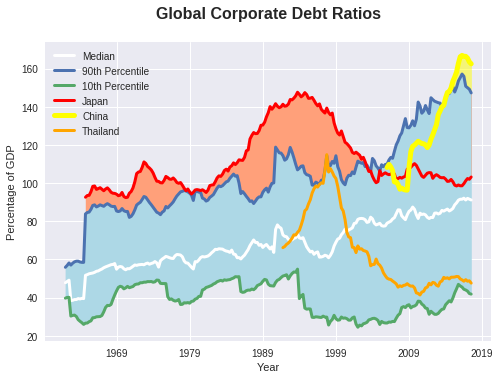

In [20]:
corpdebt = bisdata.filter(like = "Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP", axis = 1)
corpdebt = corpdebt.astype(float) #We need this to make sure that the values of corpdebt can be graphed

med = corpdebt.median(axis=1) # This will compute the median, across countries, within a year
q90 = corpdebt.quantile(0.90, axis=1) # This is going to compute the 90th percentile
q10 = corpdebt.quantile(0.10, axis=1) # This is going to compute teh 10th percentile


fig, ax  = plt.subplots()

med.plot(ax = ax, color ="white", lw = 3, label = 'Median')

q90.plot(ax = ax, lw = 3, label= '90th Percentile')

q10.plot(ax = ax, lw = 3, label = '10th Percentile')

corpdebt["""Japan - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"""].plot(
    ax = ax, color = "red", lw = 3, label = 'Japan', )

corpdebt["""China - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"""].plot(
    ax = ax, color = "yellow", lw = 5, label = "China")

corpdebt["""Thailand - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"""].plot(
    ax = ax, color = "orange", lw = 3, label = "Thailand")

ax.fill_between(med.index, q10, q90, color = "#ADD8E6")

ax.fill_between(med.index, q90, 
                corpdebt["Japan - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"],
                color = "#FFA07A" )

ax.fill_between(med.index,corpdebt["""Japan - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"""],
                q90,
where=corpdebt["""Japan - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"""] <= q90, 
                color = "#ADD8E6")

ax.fill_between(med.index,corpdebt["China - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"], 
q90, where=corpdebt["""China - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"""] >= q90,
                color = "yellow", alpha = .5 )


ax.set_title("Global Corporate Debt Ratios\n", fontweight = "bold", fontsize = 16) 
ax.set_ylabel("Percentage of GDP")
ax.set_xlabel("Year")

#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)

plt.legend()
plt.show()


This graph helps contextualize China's rising corporate debt historically, and also provides a look at global corporate leverage. Several interesting trends appear. Firstly, 

In [67]:
japdata = bisdata.filter(like = "Japan")
japgdp= japdata.filter(like = "Percentage of GDP", axis = 1)
japgdp.head(50)

,Japan - Credit to Non financial sector from All sectors at Market value - Percentage of GDP - Adjusted for breaks,Japan - Credit to General government from All sectors at Market value - Percentage of GDP - Adjusted for breaks,Japan - Credit to General government from All sectors at Nominal value - Percentage of GDP - Adjusted for breaks,Japan - Credit to Households and NPISHs from All sectors at Market value - Percentage of GDP - Adjusted for breaks,Japan - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks,Japan - Credit to Private non-financial sector from All sectors at Market value - Percentage of GDP - Adjusted for breaks,"Japan - Credit to Private non-financial sector from Banks, total at Market value - Percentage of GDP - Adjusted for breaks"
date,,,,,,,
1962-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-03-31,NaN,NaN,NaN,NaN,NaN,NaN,75.2
1963-06-30,NaN,NaN,NaN,NaN,NaN,NaN,75.9
1963-09-30,NaN,NaN,NaN,NaN,NaN,NaN,77.4
1963-12-31,NaN,NaN,NaN,NaN,NaN,NaN,78.9
1964-03-31,NaN,NaN,NaN,NaN,NaN,NaN,77.4


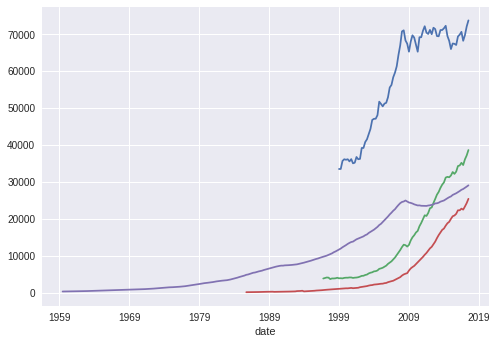

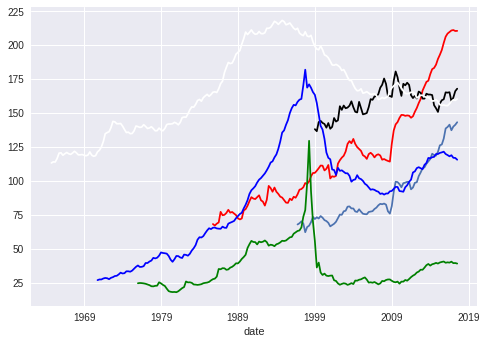

Now, we'd like to illustrate China's standing relative to the rest of the world. For this, we'll need to use a Geopandas map file. We pulled this world map file from (insert Web address hyperlink). Here, we'll begin the process of reading in the mapfile and merging relevant information into the worldmap file.

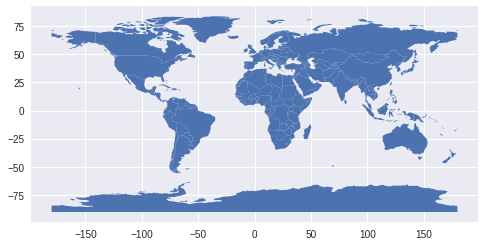

In [74]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))    #geopandas' preset dataframe for ploting world map
world.plot()
plt.show()

In [75]:
world    #GeoDataframe that contains geometry information for every coutries in the world.
         # what we need to do is to merge the data we want to plot with this GeoDataframe. 

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."


In [0]:
bis2017 = pd.DataFrame(bisdata.loc[datetime.strptime('2017-09-30', '%Y-%m-%d').date()])    #Pick 2017-09-30 data

In [0]:
bis2017.reset_index(inplace = True)    #Clear the index

In [78]:
foo = lambda bis2017: pd.Series([i for i in (bis2017.split('-', maxsplit = 1))])    #Seperate original index into name of country/market name column and debt_type column
rev = bis2017['index'].apply(foo)                                                   # 
rev1 = pd.concat([rev,(bis2017[bis2017.columns[1]])], axis=1)
rev1.columns = ["name", "debt_type", "total"]
rev1

,name,debt_type,total
0,Emerging markets (aggregate),Credit to Non financial sector from All secto...,191.9
1,Emerging markets (aggregate),Credit to Non financial sector from All secto...,176
2,Emerging markets (aggregate),Credit to Non financial sector from All secto...,51793.9
3,Emerging markets (aggregate),Credit to General government from All sectors...,48.5
4,Emerging markets (aggregate),Credit to General government from All sectors...,47.1
5,Emerging markets (aggregate),Credit to General government from All sectors...,13093.3
6,Emerging markets (aggregate),Credit to Households and NPISHs from All sect...,38.9
7,Emerging markets (aggregate),Credit to Households and NPISHs from All sect...,34.4
8,Emerging markets (aggregate),Credit to Households and NPISHs from All sect...,10494.4
9,Emerging markets (aggregate),Credit to Non-financial corporations from All...,104.3


In [79]:
rev1.debt_type.value_counts() 

 Credit to Non financial sector from All sectors at Market value - Percentage of GDP - Adjusted for breaks                                        48
 Credit to Private non-financial sector from All sectors at Market value - Percentage of GDP - Adjusted for breaks                                48
 Credit to Households and NPISHs from All sectors at Market value - USD - US Dollar - Adjusted for breaks                                         48
 Credit to Private non-financial sector from All sectors at Market value - USD - US Dollar - Adjusted for breaks                                  48
 Credit to Households and NPISHs from All sectors at Market value - Percentage of GDP - Adjusted for breaks                                       48
 Credit to Private non-financial sector from Banks, total at Market value - USD - US Dollar - Adjusted for breaks                                 48
 Credit to Non financial sector from All sectors at Market value - USD - US Dollar - Adjusted for breaks  

We do this value counts to see what we're working with in this modified dataset. Right off the bat, a few things are noticeable. Firstly, though there are over 180 countries in the BIS data set, only a max of 48 reported 2017Q3 debt types. For certain debt indicators, less than 10 countries reported information. Luckily, the specific debt indicators that we would like to pull (percentage of GDP) have at least 40 countries reporting, which will still provide a strong visual understanding of China's debt ratios relative to those around the world. 

In [80]:
#privdebt = rev1.loc[rev1['debt_type'] == "Credit to Private non-financial sector from All sectors at Market value - Percentage of GDP - Adjusted for breaks"]

priv = rev1[(rev1['debt_type']==" Credit to Private non-financial sector from All sectors at Market value - Percentage of GDP - Adjusted for breaks")]
priv["name"] = priv["name"].str.strip()
priv.rename(columns = {'total': 'Credit to Private non-financial sector'}, inplace = True)

pcGDP = rev1[(rev1['debt_type'] == ' Credit to General government from All sectors at Market value - Percentage of GDP - Adjusted for breaks')]
pcGDP["name"] = pcGDP["name"].str.strip()
pcGDP.rename(columns = {'total': 'Credit to General government'}, inplace = True)

CorDe = rev1[(rev1['debt_type'] == ' Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks')]
CorDe["name"] = CorDe["name"].str.strip()
CorDe.rename(columns = {'total': 'Credit to Non-financial corporations'}, inplace = True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [132]:
dfs = [world,priv, pcGDP, CorDe]pd
world1 = world
world1= pd.DataFrame.merge(world1,priv,on='name', how="outer")
world1= pd.DataFrame.merge(world1,pcGDP,on='name', how="outer")
world1= pd.DataFrame.merge(world1,CorDe,on='name', how="outer")

world1.drop(columns = ['debt_type_x', 'debt_type_y', 'debt_type'])

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Credit to Private non-financial sector,Credit to General government,Credit to Non-financial corporations
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",NaN,NaN,NaN
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,NaN,NaN,NaN
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",NaN,NaN,NaN
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",NaN,NaN,NaN
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,20.7,NaN,14.2
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,...",NaN,NaN,NaN
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...,NaN,NaN,NaN
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48...",NaN,NaN,NaN
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...,196.7,39.5,75.7
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,...",140.1,90.3,90.5


Now let's take a look at 3 key debt-to-GDP Ratios from this timeframe (2017 Q3) These three maps will illustrate (via color shades) the severity or magnitude of each country's relevant debt-to-GDP ratio. The darker the colors, the higher the ratio.

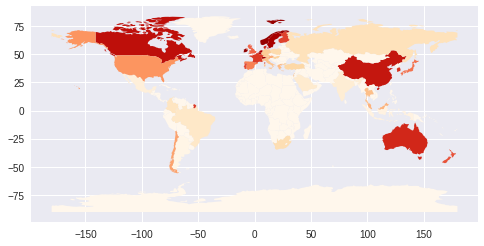

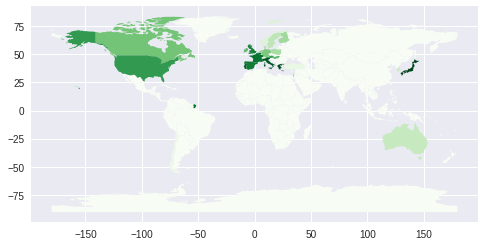

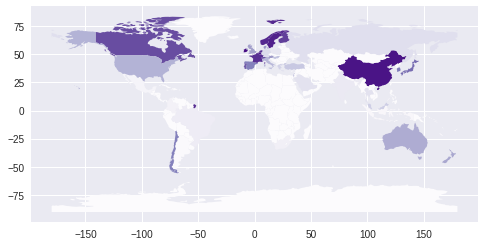

In [138]:


world1.plot(column='Credit to Private non-financial sector', cmap='OrRd')
world1.plot(column='Credit to General government', cmap='Greens')
world1.plot(column='Credit to Non-financial corporations', cmap='Purples')


In [0]:
#3*3=9 world-maps. Can look at 2005, 2010
#5 Country-comparisons
#1 Country-vs-Average
#Correlation Graph

From these maps, it's clear that by Q3 of 2017, China's non-financial corporate and private sector debt is higher than the global average, but not necessarily unprecedented.There seem to be countries with at least similar non-financial private sector and non-financial corporate debt-to-GDP ratios. Notably, Canada, and the several Scandinavian countries each appear with similar colors to China. Perhaps this is a structural result of these countries economies, and these ratios have always been this high. Let's look before the financial crisis, at a map of these indicators in 2005. 

Now we can look at what might be driving/contributing to China's evolving debt. We'll create a correlation matrix comparing China and both emerging and advanced economies. We'll do so below.

In [0]:
bisdata =bisdata.astype(float)    # in order to make a correlation matrix, we need the bisdata to be floats

bisdata1 = bisdata.filter(like = "Percentage of GDP", axis = 1)    #filtering by "Percentage of GDP", the standard unit we wish to use

corr_mat= bisdata1.corr()    #Creating the initial correlation Matrix      

china_corr = corr_mat.filter(like = "China", axis = 1)   #filtering the columns to make sure that we see China's correlation with other countries 


In [81]:
emer = china_corr.filter(like = 'Emerging', axis = 0)    #filtering on "Emerging markets"
adva = china_corr.filter(like = 'Advanced', axis = 0)   #Filtering on "Advanced economies"
econs = emer.append(adva)                               #merging the two from above

all_econs = econs.filter(like = '(using PPP exchange rates)', axis = 0) #Getting rid of some redundant entries, using PPP exchange rates
all_econs.shape      #Checking out what we've created

(13, 6)

We have all the data formatted in the way we need for a correlation heatmap. We've set it up to compare China's 6 key debt-to-GDP indicators to the indicators of both emerging markets and advanced economies. In order to make it more appealing visually, we also go throught the process of formatting the X- and Y- tick labels to remove significant redundancies. Below, we create the heatmap. 

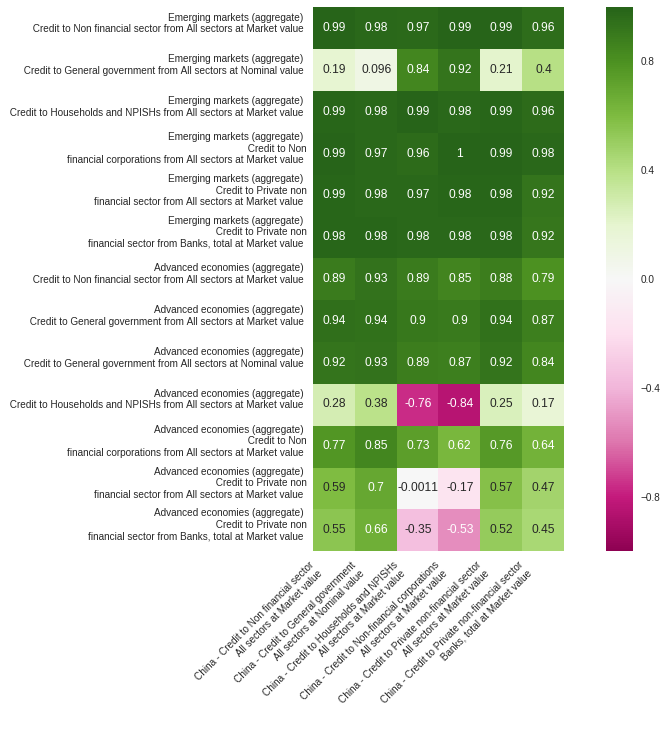

In [86]:

import seaborn as sns     #Graphics tool we need for heatmap
fig, ax =plt.subplots(figsize = (15,10))
hm = sns.heatmap(all_econs, mask=np.zeros_like(all_econs, dtype=np.bool), cmap="PiYG",  #heatmapping all_econs
           annot = True, square=True, ax=ax)    #annot = True means the heatmap will also show the correlations within the heatmap squares
###########################################################################################
xticklabels = []      #List for appending and formatting the X-ticks

for item in hm.get_xticklabels():     #
    part_1 = item.get_text().split('from')[0]
    part_2 = item.get_text().split('from')[1].split('-')[0]
    item.set_text(part_1 + '\n' + part_2 + '\n')
    xticklabels += [item]
    
yticklabels = []
for item in hm.get_yticklabels():
    part_1 = item.get_text().split('-')[0]
    part_2 = item.get_text().split('-')[1]
    part_3 = item.get_text().split('-')[2]
    if 'Percentage of GDP' in part_3:
      item.set_text(part_1 + '\n' + part_2 + '\n')
    else:
      item.set_text(part_1 + '\n' + part_2 + '\n' + part_3 + '\n')
    yticklabels += [item]
    
hm.set_xticklabels(xticklabels)
hm.set_yticklabels(yticklabels)
       
plt.xticks(rotation=45)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')

plt.show()

In [89]:
fig, ax = plt.subplots
ax = all_econs[0:5].plot()


TypeError: ignored